In [1]:
import os
import myutils

path2data = "./data"
sub_folder_jpg = "hmdb51_jpg"
path2ajpgs = os.path.join(path2data, sub_folder_jpg)

In [2]:
all_vids, all_labels, catgs = myutils.get_vids(path2ajpgs) 
len(all_vids), len(all_labels), len(catgs)

(6766, 6766, 51)

In [3]:
all_vids[:1], all_labels[:3], catgs[:5]

(['./data/hmdb51_jpg/smile/YouTube_smiles!_smile_h_nm_np1_fr_med_24'],
 ['smile', 'smile', 'smile'],
 ['smile', 'golf', 'wave', 'drink', 'clap'])

In [4]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'smile': 0,
 'golf': 1,
 'wave': 2,
 'drink': 3,
 'clap': 4,
 'smoke': 5,
 'kick_ball': 6,
 'shoot_bow': 7,
 'run': 8,
 'ride_horse': 9,
 'turn': 10,
 'dribble': 11,
 'somersault': 12,
 'fall_floor': 13,
 'pour': 14,
 'handstand': 15,
 'punch': 16,
 'kick': 17,
 'fencing': 18,
 'situp': 19,
 'shoot_ball': 20,
 'chew': 21,
 'talk': 22,
 'sword': 23,
 'hug': 24,
 'eat': 25,
 'flic_flac': 26,
 'ride_bike': 27,
 'push': 28,
 'climb': 29,
 'catch': 30,
 'hit': 31,
 'throw': 32,
 'swing_baseball': 33,
 'shake_hands': 34,
 'pick': 35,
 'walk': 36,
 'draw_sword': 37,
 'laugh': 38,
 'kiss': 39,
 'stand': 40,
 'climb_stairs': 41,
 'shoot_gun': 42,
 'sit': 43,
 'pushup': 44,
 'pullup': 45,
 'cartwheel': 46,
 'dive': 47,
 'jump': 48,
 'sword_exercise': 49,
 'brush_hair': 50}

In [5]:
idx_to_label_dict = {}
for key in labels_dict.keys():
    idx_to_label_dict[labels_dict[key]] = key
idx_to_label_dict

{0: 'smile',
 1: 'golf',
 2: 'wave',
 3: 'drink',
 4: 'clap',
 5: 'smoke',
 6: 'kick_ball',
 7: 'shoot_bow',
 8: 'run',
 9: 'ride_horse',
 10: 'turn',
 11: 'dribble',
 12: 'somersault',
 13: 'fall_floor',
 14: 'pour',
 15: 'handstand',
 16: 'punch',
 17: 'kick',
 18: 'fencing',
 19: 'situp',
 20: 'shoot_ball',
 21: 'chew',
 22: 'talk',
 23: 'sword',
 24: 'hug',
 25: 'eat',
 26: 'flic_flac',
 27: 'ride_bike',
 28: 'push',
 29: 'climb',
 30: 'catch',
 31: 'hit',
 32: 'throw',
 33: 'swing_baseball',
 34: 'shake_hands',
 35: 'pick',
 36: 'walk',
 37: 'draw_sword',
 38: 'laugh',
 39: 'kiss',
 40: 'stand',
 41: 'climb_stairs',
 42: 'shoot_gun',
 43: 'sit',
 44: 'pushup',
 45: 'pullup',
 46: 'cartwheel',
 47: 'dive',
 48: 'jump',
 49: 'sword_exercise',
 50: 'brush_hair'}

In [6]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(605, 605)

In [7]:
len(set(unique_labels))

5

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels)) 

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

544 544
61 61


In [9]:
train_ids[:5], train_labels[:5]

(['./data/hmdb51_jpg/golf/Meena_Lee_golf_f_cm_np1_ba_med_2',
  './data/hmdb51_jpg/drink/GoneBabyGone_drink_u_cm_np1_le_med_2',
  './data/hmdb51_jpg/golf/Lorena_Ochoa_et_Paula_Creamer_golf_f_cm_np1_le_med_0',
  './data/hmdb51_jpg/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_2',
  './data/hmdb51_jpg/wave/BIG_FISH_wave_u_nm_np1_le_goo_28'],
 ['golf', 'drink', 'golf', 'wave', 'wave'])

In [10]:
test_ids[:5], test_labels[:5]

(['./data/hmdb51_jpg/smile/YouTube_smiles!_smile_h_nm_np1_fr_goo_9',
  './data/hmdb51_jpg/drink/RETURN_OF_THE_KING_drink_u_cm_np2_fr_goo_2',
  './data/hmdb51_jpg/clap/boomsnapclap!_clap_u_nm_np1_fr_med_1',
  './data/hmdb51_jpg/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_10',
  './data/hmdb51_jpg/smile/YouTube_smiles!_smile_h_nm_np1_fr_bad_27'],
 ['smile', 'drink', 'clap', 'wave', 'smile'])

In [11]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import torch
import numpy as np
import random
np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):      
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)
        
        seed = np.random.randint(1e9)        
        frames_tr = []
        for frame in frames:
            random.seed(seed)
            np.random.seed(seed)
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [12]:
model_type = "rnn"    

timesteps =16
if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 112, 112
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

In [13]:
import torchvision.transforms as transforms

train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),  
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),    
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])


In [14]:
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

544


In [15]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 224, 224]), 1, tensor(-2.1179), tensor(2.6400))

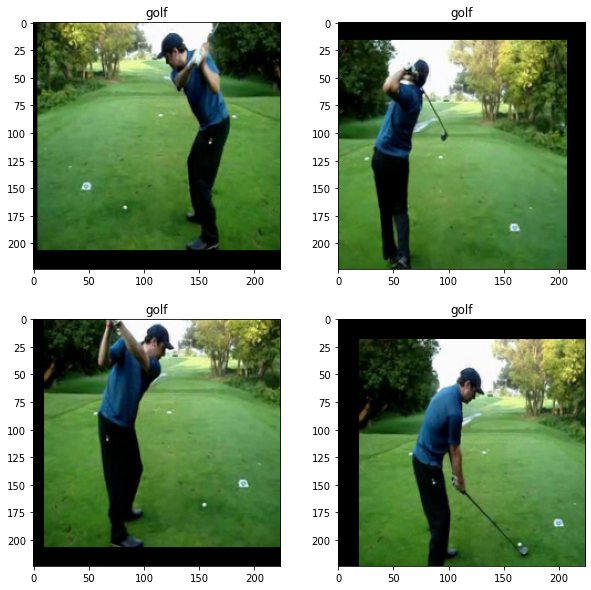

In [16]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label])

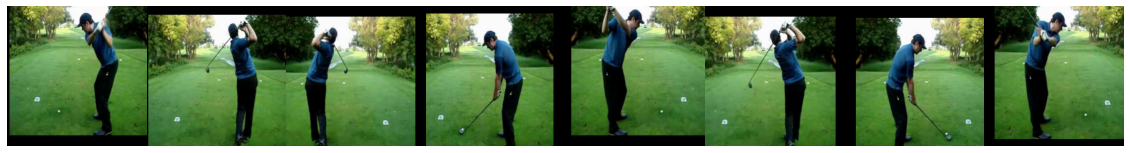

In [17]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.axis("off")

In [18]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ]) 
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

61


In [19]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 224, 224]), 3, tensor(-2.1179), tensor(2.1804))

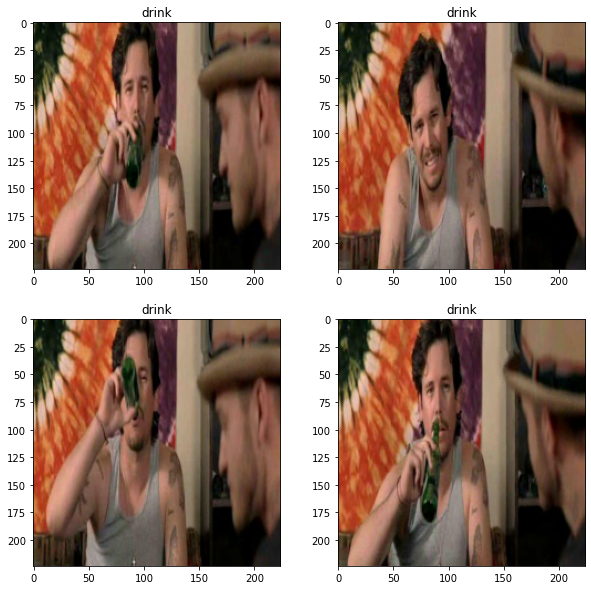

In [20]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label])

In [21]:
def collate_fn_r3d_18(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor
    

batch_size = 1
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size= batch_size,
                         shuffle=False, collate_fn= collate_fn_rnn)  
else:
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_r3d_18)
    test_dl = DataLoader(test_ds, batch_size= batch_size,
                         shuffle=False, collate_fn= collate_fn_r3d_18)

In [22]:
for xb,yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([1, 16, 3, 224, 224]) torch.Size([1])


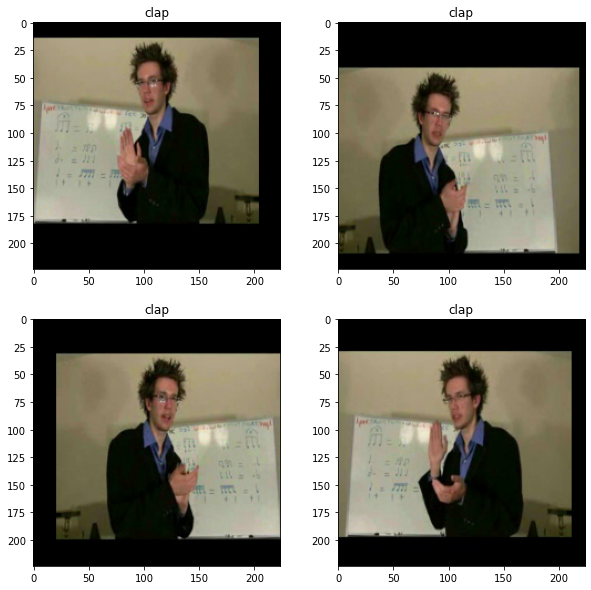

In [23]:
imgs = xb[0]
label = yb[0]
%matplotlib inline

plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(idx_to_label_dict[label.item()])

In [24]:
for xb,yb in test_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([1, 16, 3, 224, 224]) torch.Size([1])


In [258]:
models.resnet18(pretrained=True, progress=False)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
from torch import nn
import torch.nn.functional as F
class Resnt18Rnn(nn.Module):
    def __init__(self, params_model):
        super(Resnt18Rnn, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate= params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        
        baseModel = models.resnet18(pretrained=pretrained, progress=False)
        num_features = baseModel.fc.in_features
        baseModel.fc = Identity()
        self.baseModel = baseModel
        self.dropout= nn.Dropout(dr_rate)
        self.rnn = nn.LSTM(num_features, rnn_hidden_size, rnn_num_layers,batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, num_classes)
        
        self.attn = nn.Linear((rnn_hidden_size * 2), rnn_hidden_size)
        self.v = nn.Linear(rnn_hidden_size, 1, bias = False)
        
    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0
        y = self.baseModel((x[:,ii]))
#         print(y.requires_grad)
        output_list = []
#         print(y.shape)
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
#         print(hn.shape)
        output_list.append(output)
        for ii in range(1, ts):
            y = self.baseModel((x[:,ii]))
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
            output_list.append(out)
#         print(out.shape)
        
        output_list = torch.stack(output_list).squeeze(2)
        output_list = output_list.permute(1,0,2)
        #output_list: [batch, seq_len, hidden_dim]
        
        
        out = self.dropout(out[:,-1])
        out.squeeze(1)
        #out [batch, hidden_dim]
        
        src_len = output_list.shape[1]
        
        hidden = out.unsqueeze(1).repeat(1, src_len, 1)
        
        
        #hidden = [batch size, src len, dec hid dim]
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        
        energy = torch.tanh(self.attn(torch.cat((hidden, output_list), dim = 2))) 
        #energy = [batch size, src len, dec hid dim]
        
        
        attention = self.v(energy).squeeze(2)
        #attention = [batch size, src len]
        
        a = F.softmax(attention, dim = 1)
        #a = [batch size, src len]
        
        a = a.unsqueeze(1)
#         encoder_outputs = output_list.permute(1, 0, 2)
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        weighted = torch.bmm(a, output_list)
        #weighted = [batch size, 1, enc hid dim * 2]
        
        out = weighted[:,0,:]
        out = self.fc1(out) 
        return out 
    
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x 

In [113]:
class GradCamModel(nn.Module):
    def __init__(self, params_model):
        super(GradCamModel, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate= params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        model_shits_1 = []
        model_shits_2 = []
        for i in range(timesteps):
            model = Resnt18Rnn(params_model)
            model.load_state_dict(torch.load("./models/weights_"+model_type+".pt"))
            baseModel = model.baseModel
            model_shits_1.append(nn.Sequential(*list(baseModel.children())[:-2]))
            model_shits_2.append(nn.Sequential(*list(baseModel.children())[-2:]))
#         self.gradients = []
        self.model_shits_1 = nn.ModuleList(model_shits_1)
        self.model_shits_2 = nn.ModuleList(model_shits_2)
        self.rnn = model.rnn
        self.fc1 = model.fc1
        
        self.attn = nn.Linear((rnn_hidden_size * 2), rnn_hidden_size)
        self.v = nn.Linear(rnn_hidden_size, 1, bias = False)

        
    def activations_hook(self, grad):
        self.gradients.append(grad)
        
    def forward(self, x):
        self.gradients = []
        b_z, ts, c, h, w = x.shape
        ii = 0

        y_1 = self.model_shits_1[ii]((x[:,ii]))

        h = y_1.register_hook(self.activations_hook)
        y = self.model_shits_2[ii]((y_1))
        y = y.view(b_z,-1)
#         print(y.shape)
        
        output_list = []
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
        output_list.append(output)
        for ii in range(1, ts):

            y_1 = self.model_shits_1[ii]((x[:,ii]))
#             y_1.requires_grad = True
            h = y_1.register_hook(self.activations_hook)
            y = self.model_shits_2[ii]((y_1))
            y = y.view(b_z,-1)
#             rnn = model.rnn
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
            output_list.append(out)
#         out = self.dropout(out[:,-1])
        
#         out = self.fc1(out[:,-1])
    
    
        output_list = torch.stack(output_list).squeeze(2)
        output_list = output_list.permute(1,0,2)
        #output_list: [batch, seq_len, hidden_dim]
        
        
#         out = self.dropout(out[:,-1])
        out = out[:,-1].squeeze(1)
        #out [batch, hidden_dim]
        
        src_len = output_list.shape[1]
        
        hidden = out.unsqueeze(1).repeat(1, src_len, 1)
        
        
        #hidden = [batch size, src len, dec hid dim]
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        
        energy = torch.tanh(self.attn(torch.cat((hidden, output_list), dim = 2))) 
        #energy = [batch size, src len, dec hid dim]
        
        
        attention = self.v(energy).squeeze(2)
        #attention = [batch size, src len]
        
        a = F.softmax(attention, dim = 1)
        #a = [batch size, src len]
        
        a = a.unsqueeze(1)
#         encoder_outputs = output_list.permute(1, 0, 2)
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        weighted = torch.bmm(a, output_list)
        #weighted = [batch size, 1, enc hid dim * 2]
        
        out = weighted[:,0,:]
        out = self.fc1(out)
        return out 
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return torch.stack(self.gradients, dim=2)
    
    # method for the activation exctraction
    def get_activations(self, x):
        ts = x.shape[1]
        ii = 0
#         model = self.grad_models[ii]
#         baseModel = model.baseModel
#         model_shit_1 = nn.Sequential(*list(baseModel.children())[:-2])
        activations = []
        for ii in range(ts):
            activations.append(self.model_shits_1[ii]((x[:,ii])))
        return torch.stack(activations, dim=2)
    
    
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

In [27]:
from torchvision import models
params_model={
        "num_classes": num_classes,
        "dr_rate": 0.1,
        "pretrained" : True,
        "rnn_num_layers": 1,
        "rnn_hidden_size": 100,}

In [28]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'

In [29]:
# y.requires_grad
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    return x

In [30]:
a = iter(train_dl)

In [255]:
torch.save(xb,'clap_video')

In [256]:
yb

tensor([4])

In [250]:
model = GradCamModel(params_model)
#     model.train()
torch.backends.cudnn.enabled = False
model = model.to(device)
fuck = model.eval()
output= model(xb)

In [223]:
# for xb, yb in test_dl:
while True :
#     model = GradCamModel(params_model)
#     #     model.train()
#     torch.backends.cudnn.enabled = False
#     model = model.to(device)
#     model.eval()
    xb, yb  = next(a)
    xb=xb.to(device)
    yb=yb.to(device)
    output=model(xb)
    print(idx_to_label_dict[output.argmax(dim=1).item()])
    if yb.item()==output.argmax(dim=1).item():
        break
yb, output.argmax(dim=1), idx_to_label_dict[yb.item()], idx_to_label_dict[output.argmax(dim=1).item()]

clap


(tensor([4]), tensor([4]), 'clap', 'clap')

In [251]:
c = yb
activations = model.get_activations(xb).detach()
activations.shape

torch.Size([1, 512, 16, 7, 7])

In [252]:
model.zero_grad()
output[:,c].backward()
gradients = model.get_activations_gradient()
# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 3, 4])
print(gradients.shape, pooled_gradients.shape)
activations = model.get_activations(xb).detach()
channels, n_frames = activations.shape[1], activations.shape[2]
for i in range(channels):
    for j in range(n_frames):
        activations[:,i,j,:,:]*= pooled_gradients[i,j]
        
heatmap = torch.mean(activations, dim=1).squeeze().cpu()
heatmap = np.maximum(heatmap,0)
for i in range(n_frames):
    heatmap[i]/=torch.max(heatmap[i])
heatmap = heatmap.numpy()

torch.Size([1, 512, 16, 7, 7]) torch.Size([512, 16])


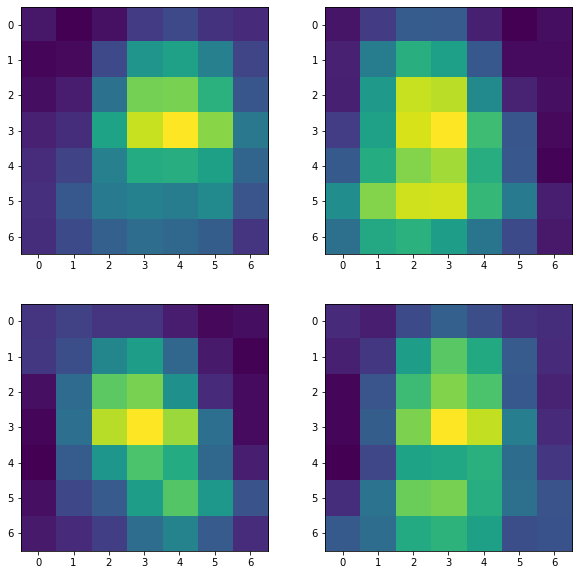

In [253]:
%matplotlib inline

plt.figure(figsize=(10,10))
for ii, _ in enumerate(range(0,n_frames,4)):
    plt.subplot(2,2,ii+1)
    plt.imshow(heatmap[ii])
#     plt.title(idx_to_label_dict[label.item()])

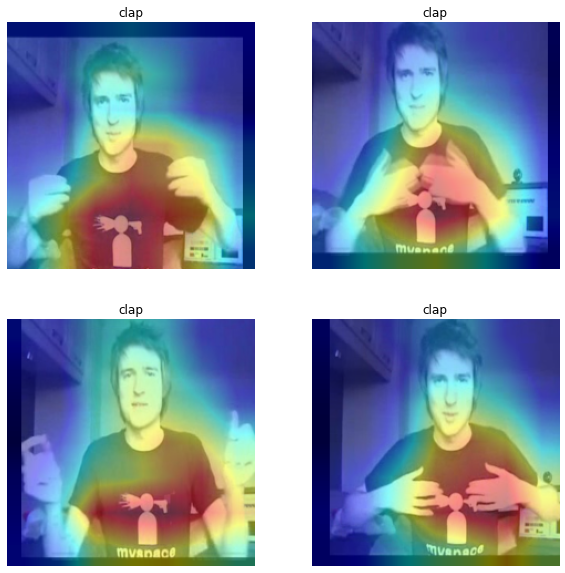

In [254]:
import cv2
import matplotlib
from torchvision.transforms.functional import to_pil_image
imgs = xb[0]
label = yb[0]
%matplotlib inline

plt.figure(figsize=(10,10))
x = 0.004
# for ii,img in enumerate(imgs[8::2]):
count = 0
for ii in range(8,12):
    count+=1
    img_ = np.array(myutils.denormalize(imgs[ii].cpu(), mean, std))
#     plt.subplot(2,2,ii+1)
    plt.subplot(2,2,count)
    heatmap_ = cv2.resize(heatmap[ii], (img_.shape[1], img_.shape[0]))
    heatmap_ = np.uint8(255 * (1-heatmap_))
    heatmap_ = cv2.applyColorMap(heatmap_, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap_ * 0.8 + img_
    superimposed_img = superimposed_img/np.max(superimposed_img)
#     cv2.imwrite('./map.jpg', superimposed_img)
    plt.axis('off')
    plt.imshow(superimposed_img)
    plt.title(idx_to_label_dict[label.item()])
#     plt.colorbar()
plt.savefig('./ADL_results/with_attention_2_.png')

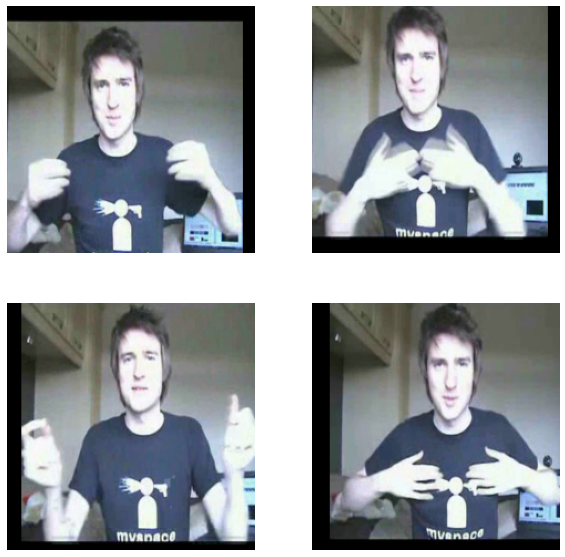

In [249]:
plt.figure(figsize=(10,10))
count = 0
for ii in range(8,12):
    count+=1
    plt.subplot(2,2,count)
    plt.imshow(myutils.denormalize(imgs[ii], mean, std))
    x =plt.axis('off')
plt.savefig('./ADL_results/with_attention_2_smile_orig.png')

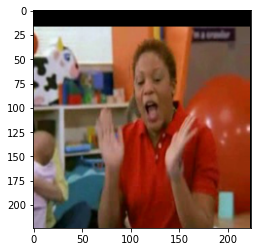

In [65]:
plt.imshow(myutils.denormalize(img.cpu(), mean, std))
plt.savefig('yo.jpg')

In [66]:
torch.min(heatmap_)

TypeError: min(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [176]:
import cv2
# img = cv2.imread('./data/Elephant/data/05fig34.jpg')
# frame_index = np.random.randint(n_frames)
print(frame_index, heatmap.shape)
heatmap_ = cv2.resize(heatmap[frame_index], (video.shape[-1], video.shape[-2]))
# heatmapshow = cv2.normalize(heatmap_, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
heatmap_ = np.uint8(255 * heatmap_)
# heatmap_ = cv2.applyColorMap(heatmap_, cv2.COLORMAP_JET)
# heatmap_ = cv2.applyColorMap(np.uint8(255 * (255 - heatmap_)), cv2.COLORMAP_JET)
superimposed_img = heatmap_ * 0.4 + myutils.denormalize(img, mean, std)
cv2.imwrite('./map.jpg', superimposed_img)
import matplotlib.image as mpimg
# img = mpimg.imread('./map.jpg')
plt.imshow(orig)
plt.show()

NameError: name 'frame_index' is not defined

In [ ]:
import time
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=3e-5)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=5,verbose=1)
os.makedirs("./models", exist_ok=True)

params_train={
    "num_epochs": 19,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": test_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": "./models/weights_"+model_type+".pt",
    }
start = time.time()
model,loss_hist,metric_hist = myutils.train_val(model,params_train)
end = time.time()
print((end-time)//60)

In [ ]:
myutils.plot_loss(loss_hist, metric_hist)

In [2]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
a = torch.load('golf_input')
b = torch.load('heatmap')

In [10]:
imgs = a[0][0]

In [67]:
label = a[1][0]
heatmap = b

TypeError: '_SingleProcessDataLoaderIter' object does not support indexing

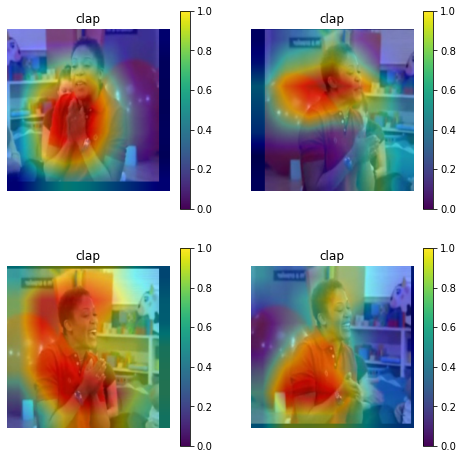

In [68]:
from torchvision.transforms.functional import to_pil_image
import myutils
%matplotlib inline
plt.figure(figsize=(8,8))


x = 0.004
for ii,img in enumerate(imgs[::4]):

    img_ = np.array(myutils.denormalize(imgs[ii].cpu(), mean, std))
    plt.subplot(2,2,ii+1)
    heatmap_ = cv2.resize(heatmap[ii], (img_.shape[1], img_.shape[0]))
    heatmap_ = np.uint8(255 * (1-heatmap_))
    heatmap_ = cv2.applyColorMap(heatmap_, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap_ * 0.8 + img_
    superimposed_img = superimposed_img/np.max(superimposed_img)
    cv2.imwrite('./map.jpg', superimposed_img)
    plt.axis('off')
    plt.imshow(superimposed_img)
    plt.savefig('./ADL_results/No_attention_5_'+str(ii)+'.png')
    plt.title(idx_to_label_dict[label.item()])
    plt.colorbar()

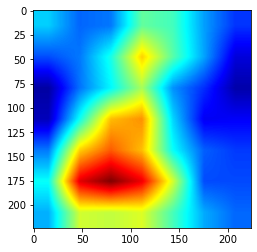

In [69]:
plt.imshow(np.uint8(heatmap_+0.0001))

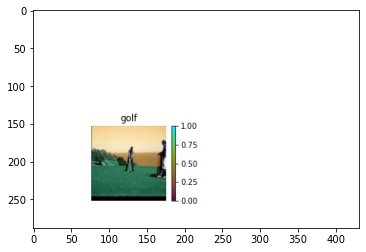

In [38]:
plt.imshow(img_)